## Import des libraries nécessaires

In [119]:
import pandas as pd 
import numpy as np

## Mise en mémoire des données

In [120]:
rowdatas = pd.read_csv("CGDRSGDRDTRoutesdernierstravaux.csv",sep=";")

On peut afficher la forme des données.

In [121]:
rowdatas.shape

(5492, 17)

Pour un meilleue aperçu des données, on affiche les premières lignes du dataset.

In [122]:
rowdatas.head()

,entityid,route,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux,naturedernierstravaux,supportdernierstravaux
0,000efbb3-e7c1-4b9c-a54e-1e0d6d81988a,76 D0131,20,0,7,7,0,490,3,200,490,3205,2715,"1,5",2012,ES-BC,COUL
1,0011b2a4-5a64-4223-a856-6c9e8b6b2b48,76 D0293,20,0,7,7,6,724,6,940,6737,6953,216,1,2002,COUL,ES
2,0011d99f-9091-4be4-a16c-354f23b24004,76 D0003,20,0,7,7,51,708,51,810,50762,50864,102,1,1991,ES,AC
3,00155332-804f-4547-8537-0897d7e479e1,76 D0915,20,0,11,9,61,800,62,711,61177,62116,939,2,2000,BBUM,COUL
4,0016e2d9-78bb-4092-b846-90452703009a,76 D0022,20,0,7,7,86,26,86,650,86141,86765,624,1,2006,COUL,BB


On affiche le type de la structure de stockage. 

In [123]:
type(rowdatas)


pandas.core.frame.DataFrame

On affiche le type des colonnes du dataframe. 

In [124]:
rowdatas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 17 columns):
entityid                    5492 non-null object
route                       5492 non-null object
rub                         5492 non-null int64
age                         5492 non-null int64
mois                        5492 non-null int64
annee                       5492 non-null int64
prd                         5492 non-null int64
abd                         5492 non-null int64
prf                         5492 non-null int64
abf                         5492 non-null int64
cumuld                      5492 non-null int64
cumulf                      5492 non-null int64
long                        5492 non-null int64
epaisseurdernierstravaux    5492 non-null object
anneedernierstravaux        5492 non-null int64
naturedernierstravaux       5492 non-null object
supportdernierstravaux      5486 non-null object
dtypes: int64(12), object(5)
memory usage: 729.5+ KB


epaisseurdernierstravaux n'est pas de type réel pour le moment. 


# Nettoyage des données
Une première étape de nettoyage peut consister à supprimer les lignes contenant des valeurs non définies (NA) 

In [132]:
rowdatas.dropna(inplace=True)

In [133]:
rowdatas.shape

(5486, 17)

Seules une dizaine de lignes sont retirées, nous n'avons donc pas altéré l'information de façon importante.

On se propose de limiter le nombre de chiffres après la virgule afin de regrouper les valeurs trop proches. 

In [134]:
%precision 2

'%.2f'

In [135]:
rowdatas.epaisseurdernierstravaux.unique()

array(['1,5', '1', '2', '6', '4', '5', '3', '8', '1,2', '0', '9999,99',
       '3,5', '10', '1,8', '0,6', '4,5', '0,5', '1,6', '2,5', '7', '7,5',
       '5,4', '0,8', '6,5', '0,1', '5,5', '22', '12', '9', '6,1', '30'], dtype=object)

On peut voir que les valeurs sont toutes situés entre 0 et 30. Notre choix de nettoyage est donc le suivant : si une valeur est supérieure à 10 fois la moyenne de la colonne, on retire la ligne à laquelle la valeur appartient. 

On change la culture pour la compréhension des chiffres à virgule.

In [136]:
from locale import *
setlocale(LC_NUMERIC, 'French_Canada.1252')

'French_Canada.1252'

On change le type des valeurs de la colonne.

In [137]:
rowdatas.epaisseurdernierstravaux = rowdatas.epaisseurdernierstravaux.apply(atof)

Puis on nettoie les valeurs suivant notre choix. 

In [138]:
meanEpaisseur = np.mean(rowdatas.epaisseurdernierstravaux)


In [139]:
rowdatas.drop(rowdatas[rowdatas.epaisseurdernierstravaux>meanEpaisseur*10].index,inplace=True)

In [140]:
rowdatas.shape

(5429, 17)

Les données sont maintenant nettoyées. 

## Analyse 

Les 5 natures de travaux les plus fréquentes

In [228]:
couplesNatureOccurence=[]
for nature in rowdatas.naturedernierstravaux.unique():
    couplesNatureOccurence.append([nature,sum([1 for i in rowdatas.naturedernierstravaux if i==nature])])
    
couplesNatureOccurence 

[['ES-BC', 198],
 ['COUL', 993],
 ['ES', 864],
 ['BBUM', 348],
 ['BBSG', 315],
 ['BBSP', 239],
 ['BB', 1186],
 ['BBTM', 339],
 ['BBM', 179],
 ['BB-REP', 178],
 ['ES-MC', 131],
 ['ECF-BC', 140],
 ['BBMP', 26],
 ['ECF-MC', 136],
 ['COUL-S', 3],
 ['ESLGg', 29],
 ['BBELA', 7],
 ['BBME', 24],
 ['ES-SP', 2],
 ['BETOFX', 9],
 ['BBSGP', 19],
 ['BBTMP', 4],
 ['ESDGSP', 5],
 ['BBMM', 4],
 ['BBELAS', 2],
 ['BETOFL', 2],
 ['BBCOL', 2],
 ['BBSGM', 3],
 ['BB+BBM', 2],
 ['ESDG', 5],
 ['I', 1],
 ['BBTMM', 13],
 ['ESLG', 1],
 ['PAVES', 8],
 ['BB-RPR', 1],
 ['BBMF', 1],
 ['ESSP', 6],
 ['ECF', 2],
 ['BBEDC', 1],
 ['BBAUT', 1]]

In [229]:
import operator
from operator import itemgetter
couplesNatureOccurence.sort(key=operator.itemgetter(1),reverse=True)

In [231]:
print("Les 5 natures les plus communes sont : ")
cinqPlusCommuns = couplesNatureOccurence[0:5]
for i in cinqPlusCommuns:
    print(i[0]," avec ", i[1]," fois.")

Les 5 natures les plus communes sont : 
BB  avec  1186  fois.
COUL  avec  993  fois.
ES  avec  864  fois.
BBUM  avec  348  fois.
BBTM  avec  339  fois.


In [241]:
labels = [i[0] for i in cinqPlusCommuns]
values = [i[1] for i in cinqPlusCommuns]

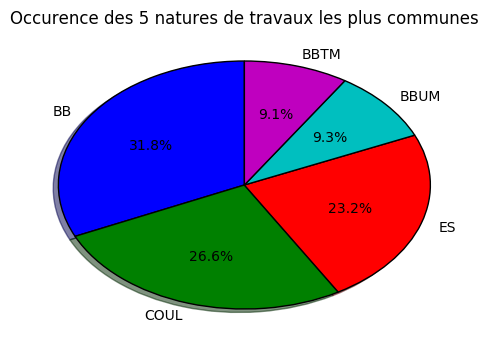

In [242]:
import matplotlib.pyplot as plt
plt.pie(values,labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Occurence des 5 natures de travaux les plus communes")
plt.show()

Nombre de travaux par an

In [189]:
numberOfActionsByYear=rowdatas.groupby(["anneedernierstravaux"])['entityid'].count()
numberOfActionsByYear

anneedernierstravaux
1900      4
1945      2
1950      1
1952      2
1974      1
1975      3
1977      1
1980      1
1981     10
1982      2
1983      9
1984      7
1985      7
1986     13
1987     16
1988      5
1989     30
1990     47
1991     33
1992     29
1993     47
1994     72
1995     74
1996    102
1997    157
1998    239
1999    270
2000    316
2001    377
2002    422
2003    268
2004    259
2005    407
2006    474
2007    418
2008    260
2009    192
2010     85
2011    199
2012    212
2013    142
2014    214
Name: entityid, dtype: int64

In [191]:
meanThicknessByYear=rowdatas.groupby(["anneedernierstravaux"])['epaisseurdernierstravaux'].mean()
meanThicknessByYear

anneedernierstravaux
1900     6.000000
1945    10.000000
1950     0.000000
1952    10.000000
1974     6.000000
1975     5.333333
1977     4.000000
1980     0.000000
1981     5.200000
1982     6.000000
1983     4.444444
1984     6.000000
1985     4.285714
1986     3.353846
1987     3.625000
1988     5.400000
1989     3.700000
1990     3.170213
1991     3.090909
1992     3.793103
1993     3.078723
1994     3.194444
1995     3.114865
1996     3.142157
1997     2.552229
1998     3.362343
1999     2.757778
2000     2.613924
2001     2.711141
2002     2.773697
2003     2.139925
2004     2.806178
2005     2.707371
2006     2.541139
2007     2.546172
2008     2.552308
2009     2.663021
2010     3.028235
2011     2.390955
2012     2.373113
2013     2.601408
2014     2.520093
Name: epaisseurdernierstravaux, dtype: float64

In [209]:
finalFrame = pd.DataFrame([numberOfActionsByYear,meanThicknessByYear]).transpose()

Epaisseur moyenne de travail et nombre de travaux par an par ordre d'épaisseur décroissante

In [216]:
finalFrame.columns = ("Nombre de travaux","Epaisseur moyenne du travaux")
finalFrame.sort_values(by=['Epaisseur moyenne du travaux'],ascending=False)

,Nombre de travaux,Epaisseur moyenne du travaux
anneedernierstravaux,,
1952,2.0,10.000000
1945,2.0,10.000000
1900,4.0,6.000000
1982,2.0,6.000000
1974,1.0,6.000000
1984,7.0,6.000000
1988,5.0,5.400000
1975,3.0,5.333333
1981,10.0,5.200000


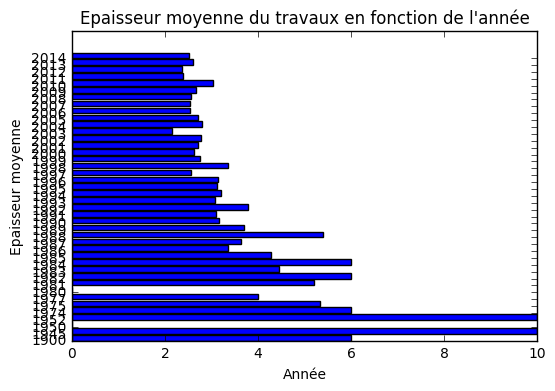

In [245]:
y_pos = np.arange(len(finalFrame['Epaisseur moyenne du travaux']))

plt.barh(y_pos, finalFrame['Epaisseur moyenne du travaux'])
plt.yticks(y_pos, finalFrame.index)
plt.xlabel('Année')
plt.ylabel('Epaisseur moyenne')
plt.title("Epaisseur moyenne du travaux en fonction de l'année")

plt.show()

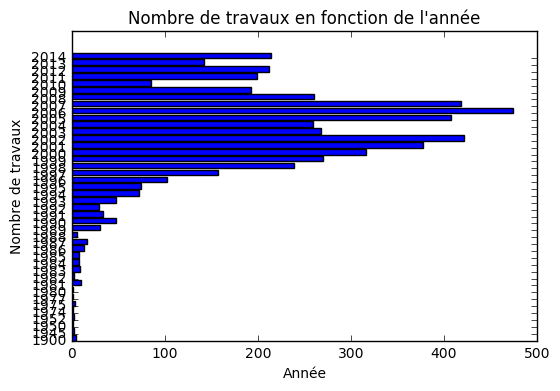

In [246]:
plt.barh(y_pos, finalFrame['Nombre de travaux'])
plt.yticks(y_pos, finalFrame.index)
plt.xlabel('Année')
plt.ylim((pd.to_numeric(finalFrame.index).min(),pd.to_numeric(finalFrame.index).max()))
plt.ylabel('Nombre de travaux')
plt.title("Nombre de travaux en fonction de l'année")

plt.show()